# Statistikk i Python 1

Vi skal i denne Jupyter Notebooken undersøke den viktigste statistikken dere kommer over i FYS-2150. 

Det første vi skal snakke om er normalfordelingen. Den er definert som:

$$f(x) = \frac{1}{\sigma\sqrt(2\pi)} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}.$$
Hvor $\mu$ er gjennomsnitt og $\sigma$ er standardavvik. 
Det er mange ting som ofte er normalfordelt, som IQ, høyde eller karakterfordeling. 

## Stat1.py

Dette programmet utfører "målinger", dvs. at den henter ut tilfeldige tall, fra en normalfordeling med gjennomsnitt $\mu$ = 10, og standardavvik $\sigma$ = 1 <br>
Det gjør den ved å kalle på en funksjon som heter performMeasurements:

In [1]:
import numpy as np
def performMeasurements(N):
    X = 10
    sigma = 1
    return sigma * np.random.randn(int(N)) + X

In [2]:
x = performMeasurements(1)
print(x) 

[9.35609171]


Én måling sier oss lite. Vi får ingen idé om f.eks. støyen i måleinstrumentet, derfor gjør vi flere målinger.


In [3]:
n = 50
x = performMeasurements(n)
print(x[1])

9.674735354875555


En god måte å illustrere målingene, er med et histogram.
X-aksen til et histogram representerer en hendelse. Det kan være om du har fått kron eller mynt, IQ-score, høyde eller om det var fint eller dårlig vær. Den teller opp antall ganger hver hendelse inntreffer, og det presenteres på Y-aksen.<br>
I vårt tilfelle så er hendelsene tall mellom 0 og 1. Derfor er det ikke rett frem hvor mange stolper histogrammet skal ha. Til det bruker vi $\textit{Sturge's} \: \textit{rule}$, som er definert som:
$$\textit{Bins} = \textit{ceil}\big(\log_2{(n)} +1\big).$$
N er antall målinger, og ceil betyr at tallet rundes opp til nærmeste heltall. 


In [4]:
import matplotlib.pyplot as plt
def histogram(x,normalisering = False):
    """
    normalisering = True, skallerer histogrammet slik at det representerer en sannsynlighetstetthet. 
    """
    bin_count = int(np.ceil(np.log2(len(x)) + 1))  #Sturge's regel
    plt.style.use('seaborn-whitegrid') # nice and clean grid
    plt.hist(x, bins=bin_count,density = normalisering, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
    plt.xlabel('Bins')
    plt.ylabel('Values')

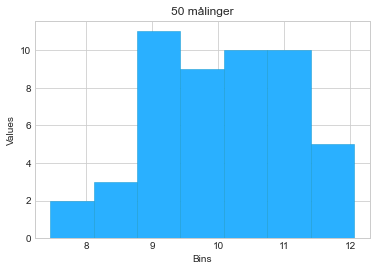

In [5]:
histogram(x)
plt.title("{} målinger".format(n))
plt.show()

Her ser man en indikasjon på en normalfordeling, dersom vi øker antall målinger ytterligere, så får vi dette: 

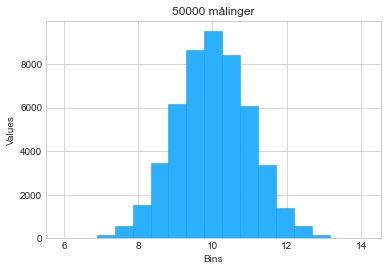

In [6]:
n = 50000
x = performMeasurements(n)
histogram(x)
plt.title("{} målinger".format(n))
plt.show()

Nå ser man svært tydelig at verdiene er normalfordelte. Ved å normalisere histogrammet, kan vi lage en sannsynlighetsfordeling. Det gjør vi, ved å sette normalisering = True. Plottet har samme form, men y-aksen skalleres kraftig ned. Vi legger en teoretisk normalfordeling over, for å se hvor godt vi treffer. 

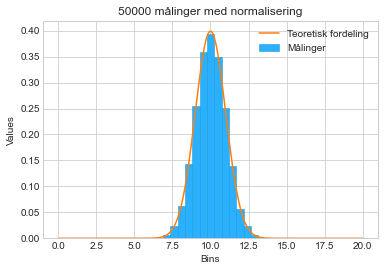

In [7]:
normalisering  = True
histogram(x,normalisering)
plt.title("{} målinger med normalisering".format(n))

sigma = 1
X = 10
x = np.linspace(X-10,X+10,1000)
theoretical_norm = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((x-X)/sigma)**2)

plt.plot(x,theoretical_norm)
plt.legend(["Teoretisk fordeling","Målinger"])
plt.show()

Dette er en god tilnærming til en teoretisk normalfordeling med $\mu$ = 10 og $\sigma$ = 1. $\textbf{Det vil allikevel alltid være en tilnærming, ettersom vi ser på en prøve og ikke hele populasjonen.}$

## Stat2.py

I dette programmet ser vi fortsatt på normalfordelingen, men vi ønsker å undersøke hvordan gjennomsnittet utvikler seg med økende antall målinger. 
For å gjøre det, så utfører vi individuelle "eksperimenter", hvor vi tar n målinger, og finner gjennomsnitt. Vi utfører 1000 eksperimenter, og lager et histogram med gjennomsnittene. 

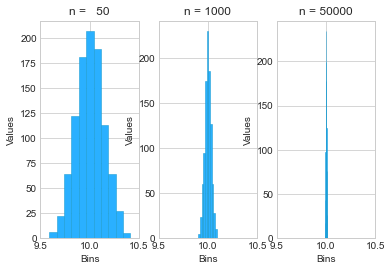

In [8]:
num_measurements = np.array([50,1e3,5e4])
reps = 1000
meanSim = np.zeros([3,reps])
for index,n in enumerate(num_measurements):
    for i in range(reps):
        meanSim[index,i] = np.mean(performMeasurements(n))
    plt.subplot(1,3,index+1)
    plt.title("n = {:4d}".format(int(num_measurements[index])))
    histogram(meanSim[index])
    plt.xlim(X-0.5,X+0.5)
plt.show()

Det vi ser i plottene er at histogrammet blir spissere og spissere, etter hvert som antall målinger økes.
Det gir mening, fordi vi får så mange målinger at vi tilnærme pupulasjonens gjennomsnitt som det sanne gjennomsnittet $\mu$.

## Stat3

I dette programmet ser vi på en uniform fordeling mellom 0 og 1. Dvs. at alle tall mellom 0 og 1 er like sannsynlige.

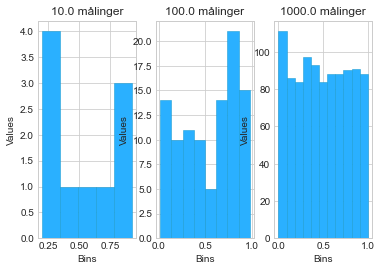

In [9]:
num_measurements = np.array([10,1e2,1e3])
for index,n in enumerate(num_measurements):
    x = np.random.uniform(0,1,int(n))
    plt.subplot(1,3,index+1)
    plt.title("{} målinger".format(num_measurements[index]))
    histogram(x)
plt.show()

Vi observerer at for økende antall målinger, kommer vi nærmere og nærmere den uniforme fordelingen. Men hva skjer med fordelingen av gjennomsnittene, dersom vi utfører mange eksperimenter?

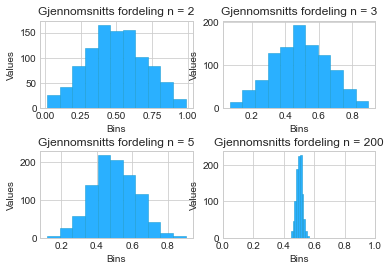

In [10]:
num_measurements = np.array([2,3,5,200])
reps = 1000
meanSim = np.zeros([4,reps])
for index,n in enumerate(num_measurements):
    meanSim[index] = [np.mean(np.random.uniform(0,1,n)) for j in range(reps)]
    plt.subplot(2,2,index+1)
    plt.subplots_adjust(hspace=0.5)
    plt.title("Gjennomsnitts fordeling n = {}".format(num_measurements[index]))
    histogram(meanSim[index])
plt.xlim(0,1)
plt.show()

Her ser vi at selv om målingene i seg selv ikke er normalfordelt,
så blir fordelingen av gjennomsnittene normalfordelt, og følger dermed [sentralgrense teoremet](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/about-the-central-limit-theorem/). 

### QQ-plot

Med det blotte øyet kan man tenke seg at plottene ser normalfordelt ut,
men en tydeligere måte å illustrere det på er med et QQ-plot.
Et QQ plot sammenligner teoretiske kvantiler, med empiriske kvantiler. <br>
En kvantil er et punkt som deler dataen inn i deler med lik sannsynlighet. 

I eksempelet under har vi en karakterfordeling som er delt inn i kvartiler (a.k.a. firedeler). Den første streken representerer $25\%$ kvartilen, og $25\%$ av dataen ligger bak dette punktet. Den neste linjen er $50\%$ kvartilen, og $50\%$ av dataen ligger bak dette punktet. Så vi ser at det er akkumulativt. <br>

Når vi finner ut hvilket datapunkt som tilsvarer f.eks. $75\%$ kvartilen. Så bruker vi formelen:

$$q(n+1)$$

Hvor q tilsvarer desimalen av prosenten vi er ute etter. F.eks. 0.25 for $25\%$, og n er antall datapunkter. 

<br>

Når du lager et QQ-plot for å undersøke normalitet i datasettet ditt, så finner du først gjennomsnittet og standardavviket. Deretter konstruerer du et datasett fra en normalfordeling med gjennomsnittet og standardavviket du fant.
Så finner du kvantilene til det nye datasettet og det opprinnelige, og plotter dem mot hverandre. 
<br>
Dersom kvantilene i ditt opprinnelige datasett er normalfordelt, vil forholdet mellom dem og de teoretiske kvantilene være lineært. Det kommer av at kvantilene er akkumulative, så en høyere kvantil vil inneholde flere datapunkter. 
















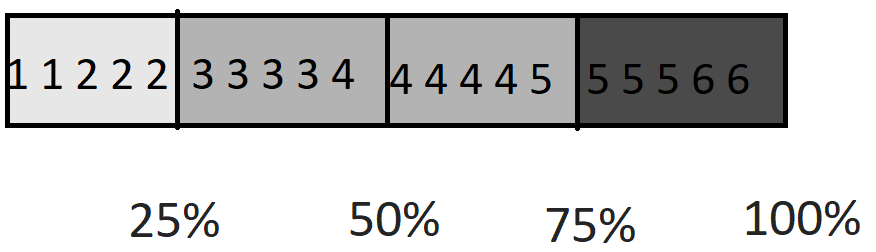


La oss undersøke om målingene fra den uniforme fordelingen er normalfordelt. 

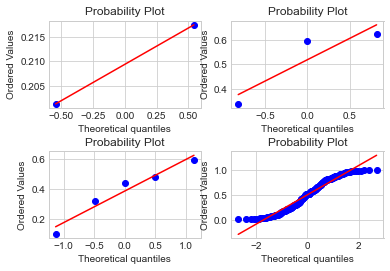

In [21]:
from scipy import stats

for i in range(len(num_measurements)):
    plt.subplot(2,2,i+1)
    stats.probplot(np.random.uniform(0,1,num_measurements[i]),plot = plt)
plt.subplots_adjust(hspace=0.5)    
plt.show()

Vi ser tydelig at punktene viker fra linjen, og at dataene ikke er normalfordelt. Men, hva skjer dersom vi lager de samme plottene, men bruker gjennomsnittene.

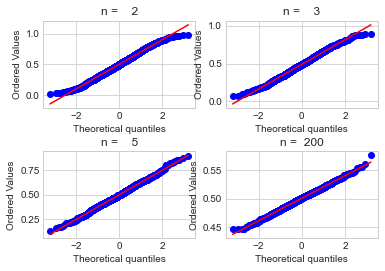

In [22]:
for i in range(len(num_measurements)):
    plt.subplot(2,2,i+1)
    stats.probplot(meanSim[i],plot = plt)
    plt.title("n = {:4d}".format(int(num_measurements[i])))
plt.subplots_adjust(hspace=0.5)
plt.show()

Her ser vi tydelig at ved tilstrekkelig antall målinger, 
vil gjennomsnittene bli normalfordelt. 




